In [8]:
import pandas as pd

# Specify the file paths
train_file_path = '/content/emotion-labels-train.csv'
test_file_path = '/content/emotion-labels-test.csv'
val_file_path = '/content/emotion-labels-val.csv'

# Read the CSV files into pandas DataFrames
train = pd.read_csv(train_file_path,encoding='latin1')
test= pd.read_csv(test_file_path,encoding='latin1')
val = pd.read_csv(val_file_path,encoding='latin1')
df = pd.concat([train, test, val], ignore_index=True)

# Now you have three DataFrames: train_df, test_df, and val_df


In [9]:
df

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game â¤ï¸â¤ï...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
7097,Common app just randomly logged me out as I wa...,sadness
7098,"I'd rather laugh with the rarest genius, in be...",sadness
7099,If you #invest in my new #film I will stop ask...,sadness
7100,"Just watched Django Unchained, Other people ma...",sadness


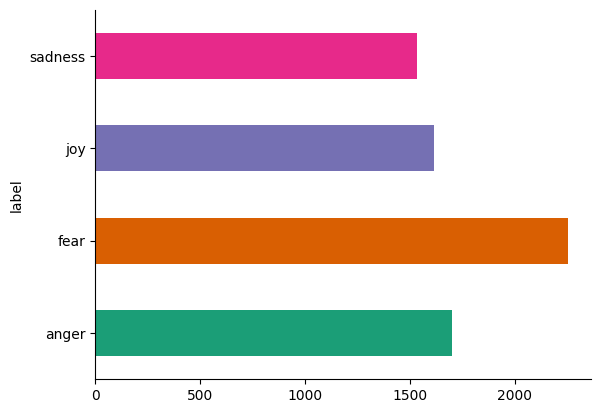

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
import numpy as np # linear algebra
import pandas as pd

In [12]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [13]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7102 non-null   object
 1   label   7102 non-null   object
dtypes: object(2)
memory usage: 111.1+ KB


,text,label
7097,Common app just randomly logged me out as I wa...,sadness
7098,"I'd rather laugh with the rarest genius, in be...",sadness
7099,If you #invest in my new #film I will stop ask...,sadness
7100,"Just watched Django Unchained, Other people ma...",sadness
7101,@KeithOlbermann depressing how despicable Trum...,sadness


In [14]:
df.shape

(7102, 2)

In [15]:
#DATA PREPROCESSING

In [16]:
df['text']=df['text'].str.lower()
df

,text,label
0,just got back from seeing @garydelaney in burs...,joy
1,oh dear an evening of absolute hilarity i don'...,joy
2,been waiting all week for this game â¤ï¸â¤ï...,joy
3,"@gardiner_love : thank you so much, gloria! yo...",joy
4,i feel so blessed to work with the family that...,joy
...,...,...
7097,common app just randomly logged me out as i wa...,sadness
7098,"i'd rather laugh with the rarest genius, in be...",sadness
7099,if you #invest in my new #film i will stop ask...,sadness
7100,"just watched django unchained, other people ma...",sadness


In [17]:
import re
def fix_puntuation(text):
    return re.sub("`","'",text)
df['text']=df['text'].astype(str).apply(lambda x: fix_puntuation(x))

In [18]:
!pip install contractions --quiet
import contractions
def fix_contraction(text):
    return contractions.fix(text)
df['text']=df['text'].astype(str).apply(lambda x: fix_contraction(x))
df.head(5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.4 MB/s eta 0:00:00


,text,label
0,just got back from seeing @garydelaney in burs...,joy
1,oh dear an evening of absolute hilarity i do n...,joy
2,been waiting all week for this game â¤ï¸â¤ï...,joy
3,"@gardiner_love : thank you so much, gloria! yo...",joy
4,i feel so blessed to work with the family that...,joy


In [19]:
def cleaning(text):
  text=re.sub('[^a-zA-Z]|https?://\S+|www.\.\S+|<.*?|0-9>'," ",text) #except a-z, A-Z, 0-9 remaining all are are substituted as '
  text=re.sub('\s+',' ',text) #additional spaces are removed using this statement
  return text
df['text']=df['text'].astype(str).apply(lambda x: cleaning(x))
df.sample(10)

,text,label
2921,back in cardiff after an amazing days away dep...,sadness
2635,holding a grudge on someone will stop your ble...,anger
4581,obama doj have destroyed usa these charlottep...,fear
972,pakistan is the biggest victim of terrorism na...,fear
6165,mlastandard the depth that you have sunk to y...,sadness
5579,yo gurls dm for a tribute snapme dm nudes trib...,anger
1017,how maybe it was with you and your parents tha...,fear
2617,the most important thing to bestrong is to hol...,anger
5973,you boys dint know the game am i the game life...,anger
317,ofc aldubqc glad you gained some cheery vibes...,joy


In [20]:
import nltk #Natural Language Toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
s=list(stopwords.words('english'))
s.remove('no')
s.remove('nor')
s.remove('not')
s=set(s)
def rem_s(text):
    return " ".join([word for word in text.split()if word not in s])

In [22]:
df['text']=df['text'].astype(str).apply(lambda x: rem_s(x))
df.sample(10)

,text,label
1186,awful ways saying way treated aniston alone ma...,fear
3377,grave beat bravehearted cave lover cage lover ...,sadness
3658,love laughing crying works katherinemansfield ...,joy
6151,least not guy trying discourage anymore want n...,sadness
183,finally raining ashland oregon parched summer ...,joy
1684,jeans fake pockets horrible,fear
817,seriously marksandspencer sick grumpy thing go...,joy
582,cover smile maybe get better,joy
2732,well lines sweden goals sure sting,anger
419,uklittlekitchen defo hearty root veg gratin ni...,joy


In [23]:
df.isna().sum()

text     0
label    0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.duplicated().sum()

29

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.reset_index(drop=True, inplace=True)

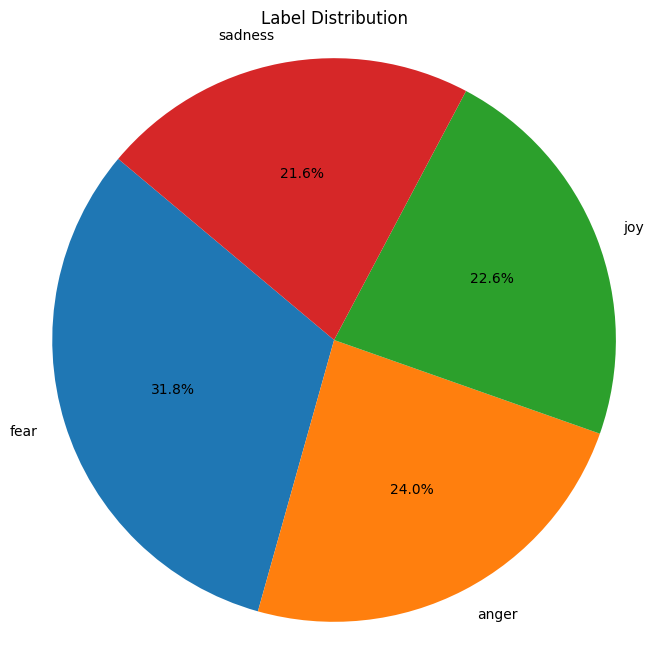

In [28]:
label_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')
plt.show()

In [29]:
max_words = 5000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
data = pad_sequences(sequences, maxlen=max_sequence_length)

In [30]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])
class_names = label_encoder.classes_

In [31]:
train_data, val_data, train_labels, val_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [32]:
train_data = torch.tensor(train_data, dtype=torch.long)
val_data = torch.tensor(val_data, dtype=torch.long)
train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)

batch_size = 32

train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [33]:
class CNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes):
        super(CNNTextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_filters, (fs, embedding_dim)) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [F.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in x]
        x = torch.cat(x, 1)
        x = self.fc(x)
        return x


In [34]:
vocab_size = max_words
embedding_dim = 100
num_filters = 128
filter_sizes = [3, 4, 5]
num_classes = len(label_encoder.classes_)

In [35]:
# Create the CNN model
cnn_model = CNNTextClassifier(vocab_size, embedding_dim, num_filters, filter_sizes, num_classes)

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

In [37]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

Epoch 1 - Loss: 1.245873446855168, Accuracy: 42.93%
Epoch 1 - Validation Loss: 1.0795982758204141, Validation Accuracy: 56.18%
Epoch 2 - Loss: 0.6659472084651559, Accuracy: 78.97%
Epoch 2 - Validation Loss: 0.8805578913953569, Validation Accuracy: 65.23%
Epoch 3 - Loss: 0.2951572373256845, Accuracy: 93.04%
Epoch 3 - Validation Loss: 0.7183976213137309, Validation Accuracy: 74.42%
Epoch 4 - Loss: 0.18788766050658656, Accuracy: 95.90%
Epoch 4 - Validation Loss: 0.7826535562674205, Validation Accuracy: 73.36%
Epoch 5 - Loss: 0.16139361399125918, Accuracy: 96.52%
Epoch 5 - Validation Loss: 0.725477495458391, Validation Accuracy: 75.69%
Epoch 6 - Loss: 0.15413618055145956, Accuracy: 96.71%
Epoch 6 - Validation Loss: 0.7276977227793799, Validation Accuracy: 76.68%
Epoch 7 - Loss: 0.14613771834279185, Accuracy: 96.68%
Epoch 7 - Validation Loss: 0.7198797239197625, Validation Accuracy: 77.46%
Epoch 8 - Loss: 0.14587777968769694, Accuracy: 96.78%
Epoch 8 - Validation Loss: 0.8090829862488641, V

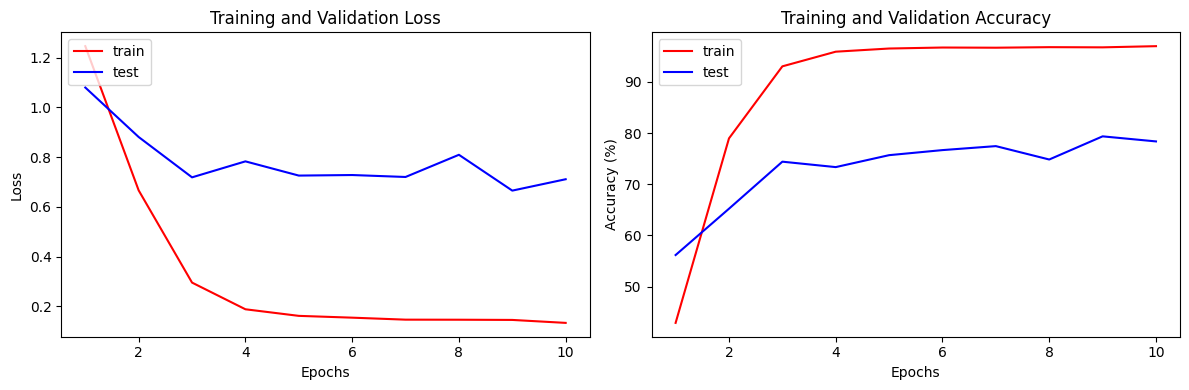

In [38]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 10 # Adjust as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)

for epoch in range(num_epochs):
    cnn_model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0

    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for this epoch
    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Print training loss and accuracy for this epoch
    print(f"Epoch {epoch+1} - Loss: {avg_train_loss}, Accuracy: {train_accuracy:.2f}%")

    # Validation
    cnn_model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data, labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = cnn_model(data)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy for this epoch
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = (correct_val / total_val) * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    # Print validation loss and accuracy for this epoch
    print(f"Epoch {epoch+1} - Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy:.2f}%")

# Plotting training and validation losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, 'r', label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['train', 'test'], loc='upper left')

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, 'r', label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

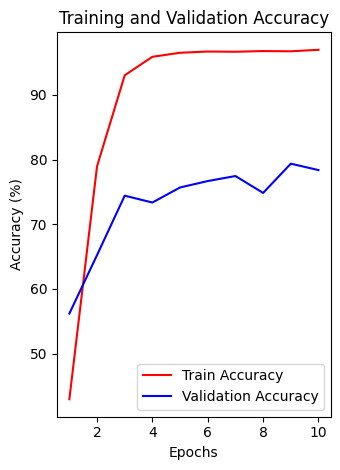

In [39]:
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, 'r', label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

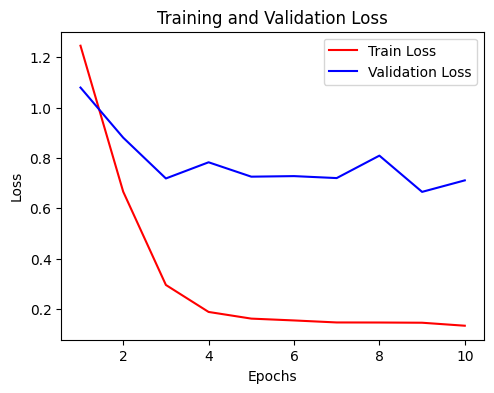

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, 'r', label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [41]:
cnn_model.eval()
val_preds = []
val_true = []

for data, labels in val_loader:
    data, labels = data.to(device), labels.to(device)
    with torch.no_grad():
        outputs = cnn_model(data)
    _, predicted = torch.max(outputs, 1)
    val_preds.extend(predicted.cpu().numpy())
    val_true.extend(labels.cpu().numpy())

In [42]:
from sklearn.metrics import accuracy_score, classification_report

val_accuracy = accuracy_score(val_true, val_preds)
val_report = classification_report(val_true, val_preds, target_names=label_encoder.classes_)

print(f"Validation Accuracy: {val_accuracy}")
print("Validation Report:\n", val_report)

Validation Accuracy: 0.7837455830388692
Validation Report:
               precision    recall  f1-score   support

       anger       0.86      0.73      0.79       327
        fear       0.75      0.86      0.80       452
         joy       0.86      0.80      0.83       328
     sadness       0.70      0.71      0.71       308

    accuracy                           0.78      1415
   macro avg       0.79      0.78      0.78      1415
weighted avg       0.79      0.78      0.78      1415



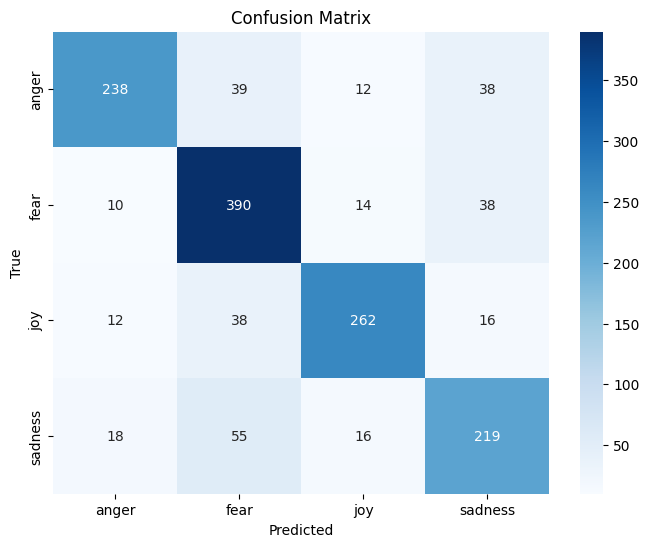

In [43]:
cnn_model.eval()
val_preds = []
val_true = []

for data, labels in val_loader:
    data, labels = data.to(device), labels.to(device)
    with torch.no_grad():
        outputs = cnn_model(data)
    _, predicted = torch.max(outputs, 1)
    val_preds.extend(predicted.cpu().numpy())
    val_true.extend(labels.cpu().numpy())


conf_matrix = confusion_matrix(val_true, val_preds)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [44]:
#bert model

In [45]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from transformers import TFBertForSequenceClassification, BertTokenizer
import matplotlib.pyplot as plt

In [46]:
model_name = "bert-base-uncased"  # You can choose a different BERT variant if needed
tokenizer1 = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
max_length = 48
X = tokenizer1(list(df['text']), padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

In [49]:
from sklearn.model_selection import train_test_split

# Convert TensorFlow tensors to NumPy arrays
X_train_numpy = X['input_ids'].numpy()
y_train_numpy = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_numpy, y_train_numpy, test_size=0.2, random_state=42)

In [50]:
batch_size = 64# Define your desired batch size
train_dataset1 = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(batch_size)
test_dataset1 = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [51]:
num_samples = len(X_train)
subset_size = int(0.5* num_samples)
random_indices = np.random.choice(num_samples, size=subset_size, replace=False)
X_train_subset = X_train[random_indices]
y_train_subset = y_train[random_indices]

In [52]:
num_classes = len(label_encoder.classes_)
input_ids = Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
bert_output = bert_model(input_ids)[0]



output = Dense(num_classes, activation='softmax')(bert_output)
model = Model(inputs=input_ids, outputs=output)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
from sklearn.metrics import accuracy_score, classification_report

val_accuracy = accuracy_score(val_true, val_preds)
val_report = classification_report(val_true, val_preds, target_names=label_encoder.classes_)

print(f"Validation Accuracy: {val_accuracy}")
print("Validation Report:\n", val_report)

Validation Accuracy: 0.7837455830388692
Validation Report:
               precision    recall  f1-score   support

       anger       0.86      0.73      0.79       327
        fear       0.75      0.86      0.80       452
         joy       0.86      0.80      0.83       328
     sadness       0.70      0.71      0.71       308

    accuracy                           0.78      1415
   macro avg       0.79      0.78      0.78      1415
weighted avg       0.79      0.78      0.78      1415

